# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

Objective: To construct a model to predict whether a transaction is fraudulent or not. We have a dataset of Automobile insurance and we need a model that identify if an insurance claim is fradulent or no.

Identifying Type: The target variable says YES/NO, is a Binary Classification task. Hence we will be trying classification Algorithms.



In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data saved in .csv format
df= pd.read_csv("Insuranace_Claim_Fraud.csv")
df=pd.DataFrame(data=df)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
# Column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
# data size
df.shape
#There are 1000 rows and 40 columns

(1000, 40)

In [6]:
#checking the datatype of each column 
print(df.dtypes)

print(df.info())

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#Statistical info
df.describe(include='all').T

count unique                      top freq  \
months_as_customer           1000    NaN                      NaN  NaN   
age                          1000    NaN                      NaN  NaN   
policy_number                1000    NaN                      NaN  NaN   
policy_bind_date             1000    951               28-04-1992    3   
policy_state                 1000      3                       OH  352   
policy_csl                   1000      3                  250/500  351   
policy_deductable            1000    NaN                      NaN  NaN   
policy_annual_premium        1000    NaN                      NaN  NaN   
umbrella_limit               1000    NaN                      NaN  NaN   
insured_zip                  1000    NaN                      NaN  NaN   
insured_sex                  1000      2                   FEMALE  537   
insured_education_level      1000      7                       JD  161   
insured_occupation           1000     14        machine-op-inspct   93   
insured_hobbies              1000     20                  reading   64   
insured_relationship         1000      6                own-child  183   
capital-gains                1000    NaN                      NaN  NaN   
capital-loss                 1000    NaN                      NaN  NaN   
incident_date                1000     60               02-02-2015   28   
incident_type                1000      4  Multi-vehicle Collision  419   
collision_type               1000      4           Rear Collision  292   
incident_severity            1000      4             Minor Damage  354   
authorities_contacted        1000      5                   Police  292   
incident_state               1000      7                       NY  262   
incident_city                1000      7              Springfield  157   
incident_location            1000   1000             1364 Best St    1   
incident_hour_of_the_day     1000    NaN                      NaN  NaN   
number_of_vehicles_involved  1000    NaN                      NaN  NaN   
property_damage              1000      3                        ?  360   
bodily_injuries              1000    NaN                      NaN  NaN   
witnesses                    1000    NaN                      NaN  NaN   
police_report_available      1000      3                        ?  343   
total_claim_amount           1000    NaN                      NaN  NaN   
injury_claim                 1000    NaN                      NaN  NaN   
property_claim               1000    NaN                      NaN  NaN   
vehicle_claim                1000    NaN                      NaN  NaN   
auto_make                    1000     14                    Dodge   80   
auto_model                   1000     39                      RAM   43   
auto_year                    1000    NaN                      NaN  NaN   
fraud_reported               1000      2                        N  753   
_c39                            0    NaN                      NaN  NaN   

                                  mean          std     min      25%     50%  \
months_as_customer             203.954      115.113       0   115.75   199.5   
age                             38.948      9.14029      19       32      38   
policy_number                   546239       257063  100804   335980  533135   
policy_bind_date                   NaN          NaN     NaN      NaN     NaN   
policy_state                       NaN          NaN     NaN      NaN     NaN   
policy_csl                         NaN          NaN     NaN      NaN     NaN   
policy_deductable                 1136      611.865     500      500    1000   
policy_annual_premium          1256.41      244.167  433.33  1089.61  1257.2   
umbrella_limit               1.101e+06  2.29741e+06  -1e+06        0       0   
insured_zip                     501214      71701.6  430104   448404  466446   
insured_sex                        NaN          NaN     NaN      NaN     NaN   
insured_education_level          

No missing values identified.
column '_c39' is unwanted and hence i will be dropping the same.
Also policy_number could be irrelevant as well and hence we can drop that as well.
Age ranges from 19-64yrs
Policy annual premium ranges from 433-2043

# EXPLORATORY DATA ANALYSIS

In [9]:
# There are '?' in the datset which we will replace by NaN Values
df = df.replace('?',np.NaN)

In [10]:
#Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are 178 missing values in collision_type,360 missing values in property_damage,343 missing values in police_report_available and 1000 misssing values in c39

In [12]:
# there are null values in columns collision_type, property_damage and police_report_available.
# Lets replace the null values with most frequent value
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

In [13]:
df.isnull().any().any()

True

In [14]:
# Lets delete policy_number column
df=df.drop(['policy_number','_c39'] ,axis=1)

In [15]:
#Checking shape again
df.shape
#2 columns reduced from the original dataset

(1000, 38)

In [17]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [18]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [19]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [27]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:>

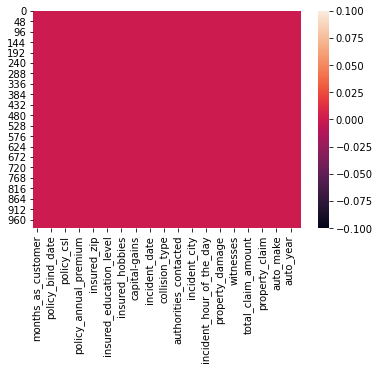

In [20]:
#checking null values using heat map
sns.heatmap(df.isnull())
#we can see that their is no null values present

In [21]:
#Checking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

There is no missing values

VISUALIZATION

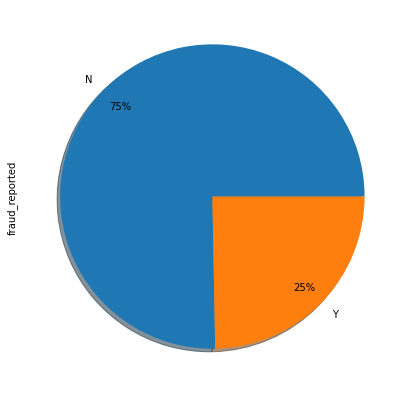

In [16]:
# Plotting target variable
plt.figure(figsize=(7,7))
df['fraud_reported'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

25% claim is approved.
75% claim rejected due to various reasons.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

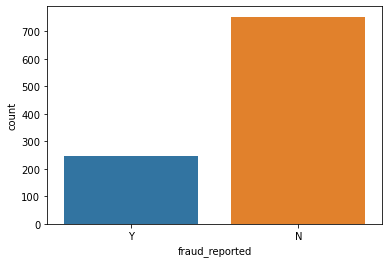

In [22]:
sns.countplot(df['fraud_reported'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

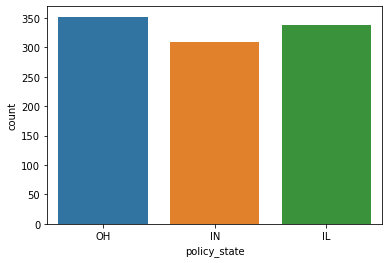

In [23]:
sns.countplot(df['policy_state'])

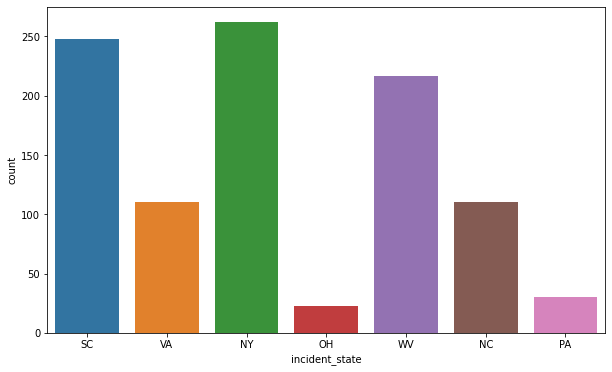

In [32]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

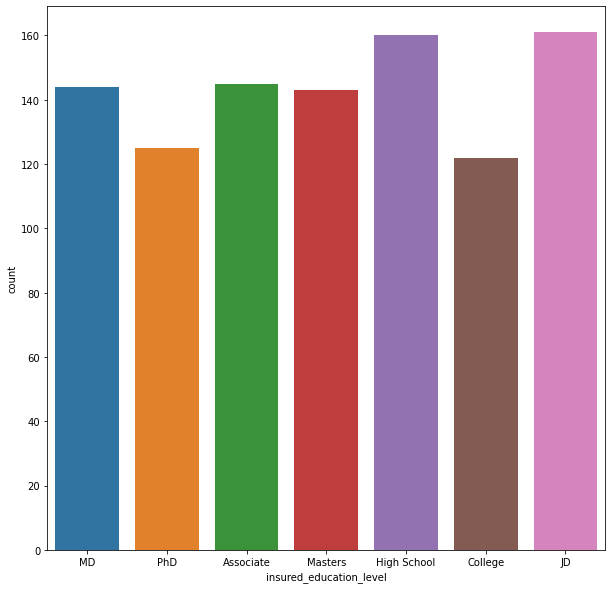

In [24]:
plt.subplots(figsize=(10,10))
sns.countplot(df['insured_education_level'])

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

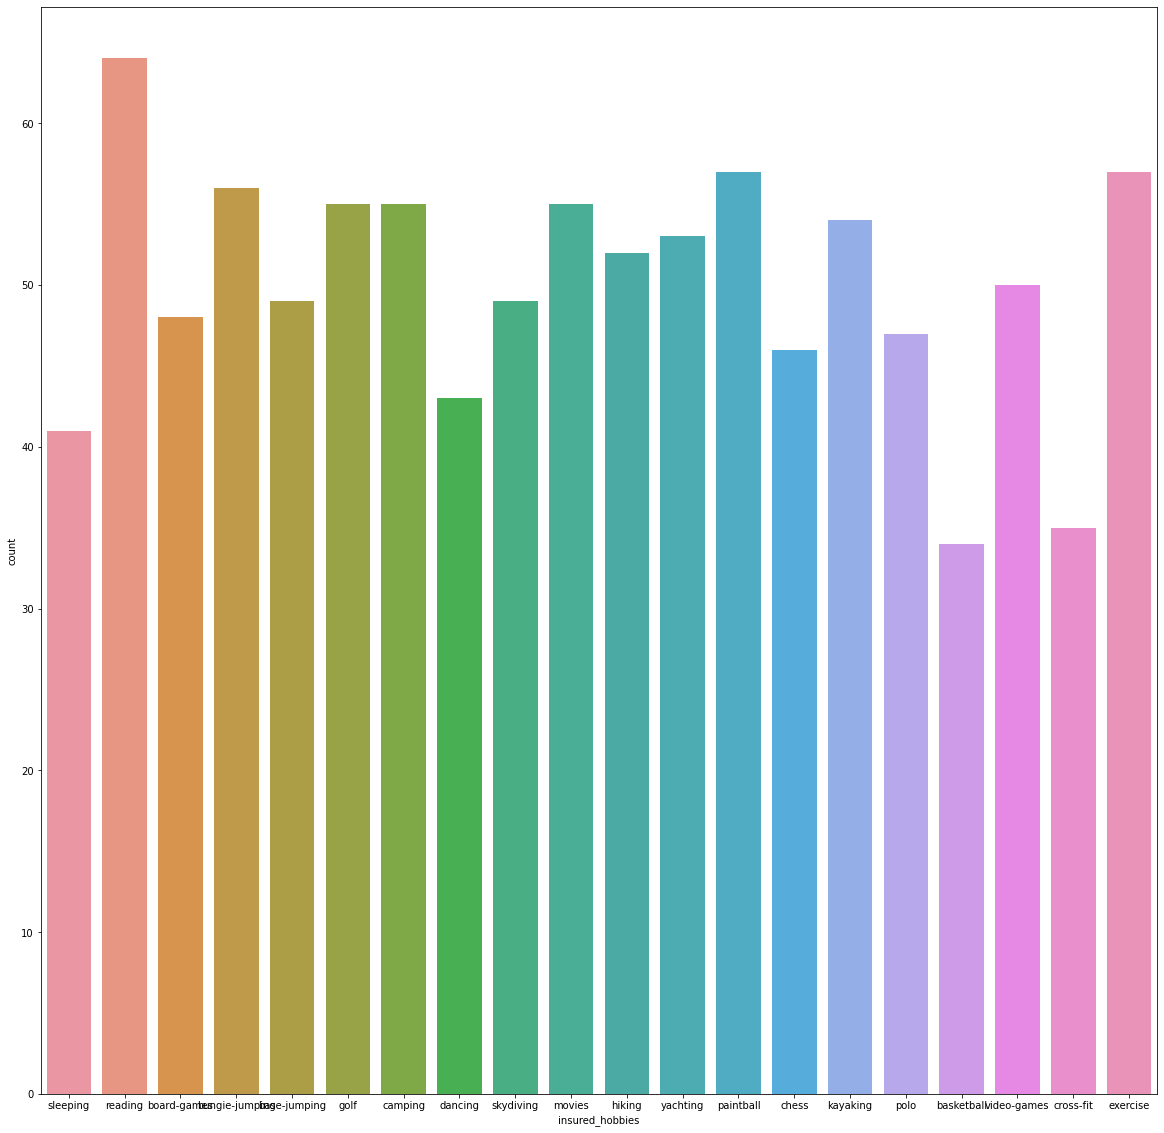

In [33]:
plt.subplots(figsize=(20,20))
sns.countplot(df['insured_hobbies'])

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

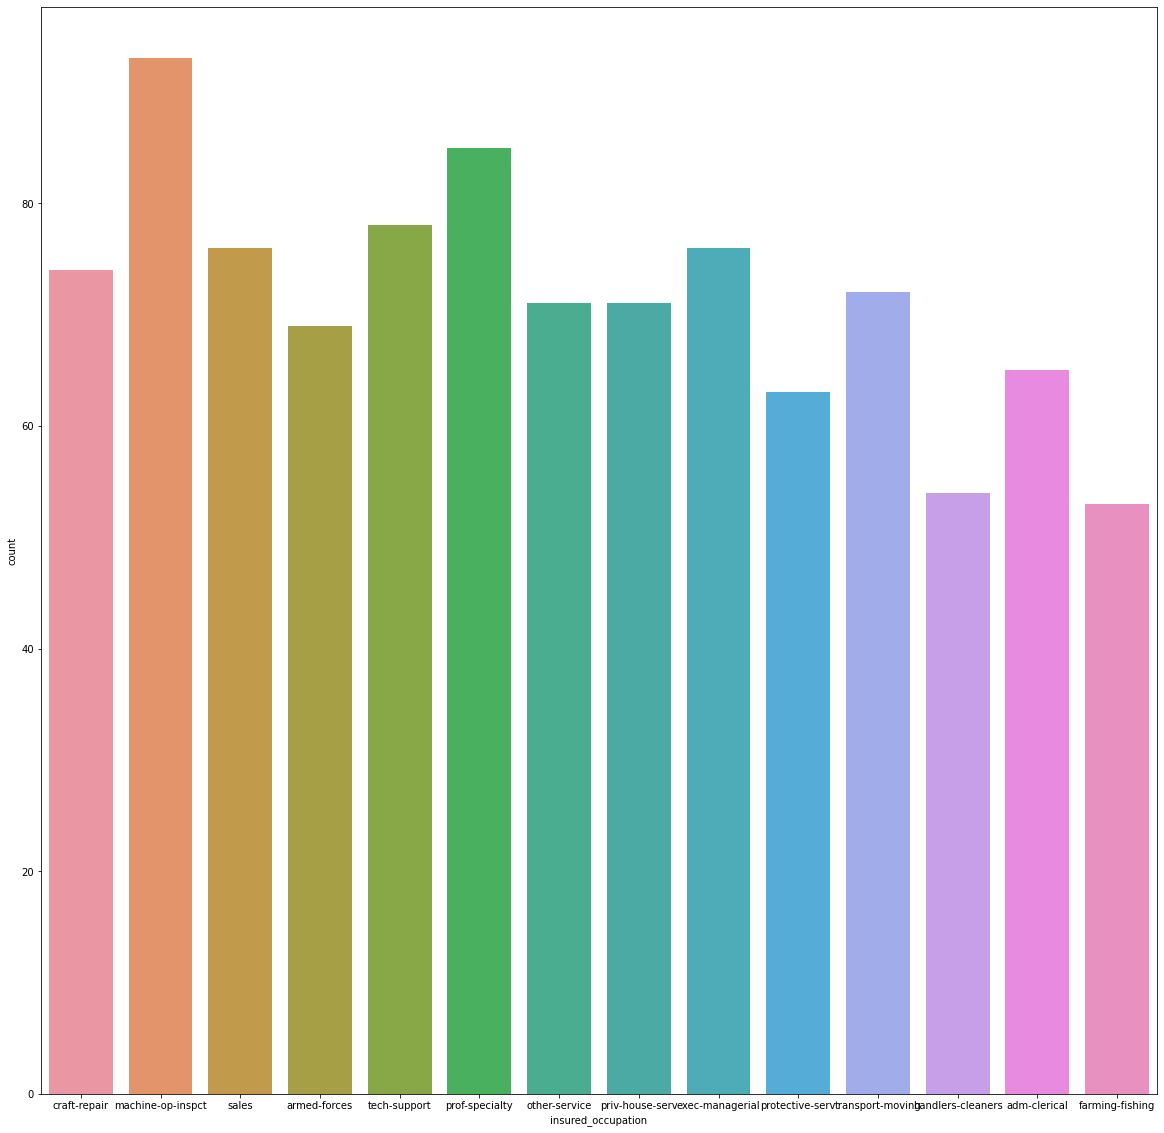

In [25]:
plt.subplots(figsize=(20,20))
sns.countplot(df['insured_occupation'])

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

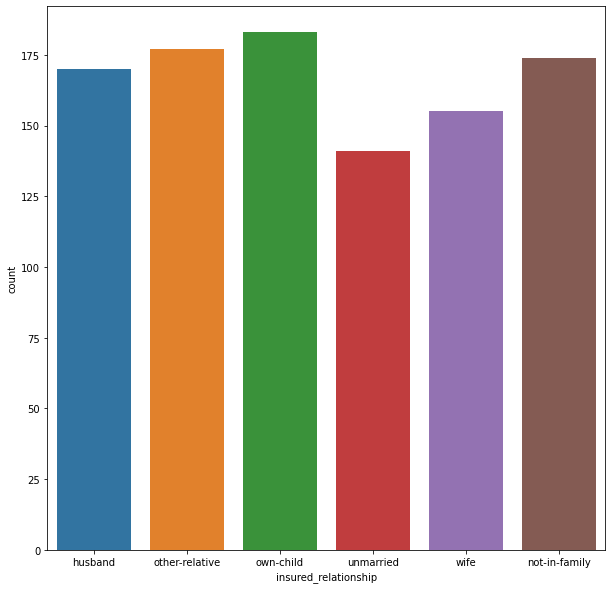

In [34]:
plt.subplots(figsize=(10,10))
sns.countplot(df['insured_relationship'])

<AxesSubplot:xlabel='auto_make', ylabel='count'>

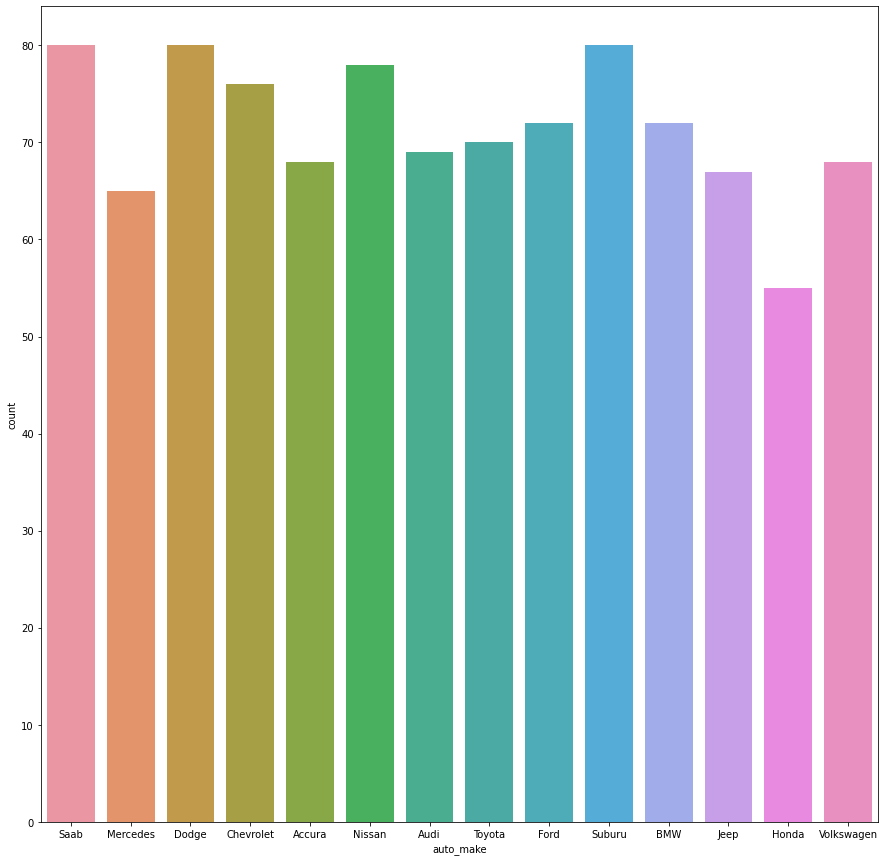

In [35]:
plt.subplots(figsize=(15,15))
sns.countplot(df['auto_make'])

Bivariate analysis

<AxesSubplot:xlabel='incident_type', ylabel='count'>

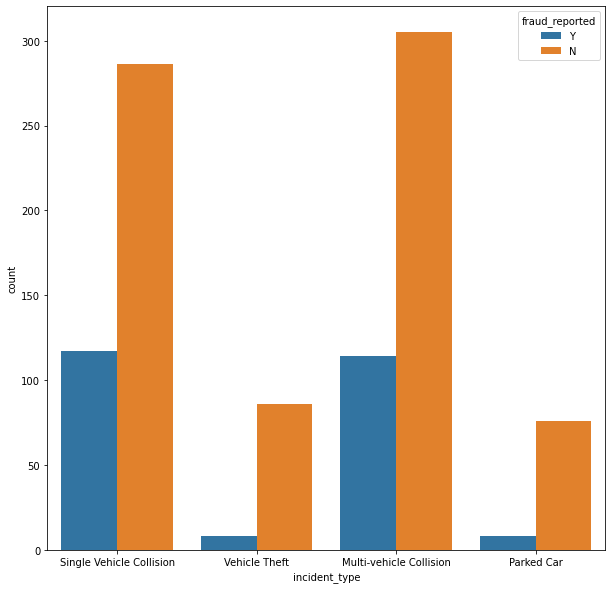

In [36]:
plt.subplots(figsize=(10,10))
sns.countplot(x="incident_type",hue="fraud_reported",data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

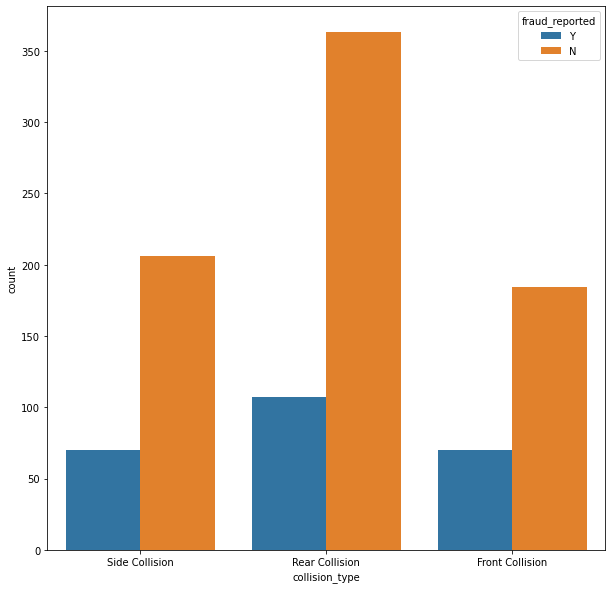

In [37]:
plt.subplots(figsize=(10,10))
sns.countplot(x="collision_type",hue="fraud_reported",data=df)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

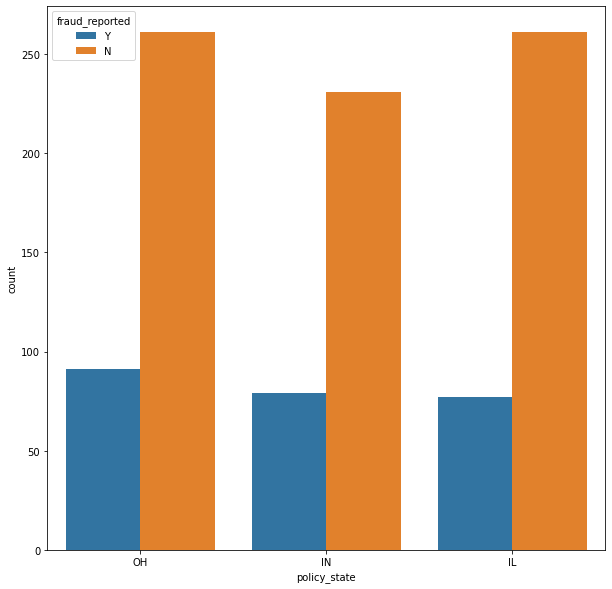

In [39]:
plt.subplots(figsize=(10,10))
sns.countplot(x="policy_state",hue="fraud_reported",data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

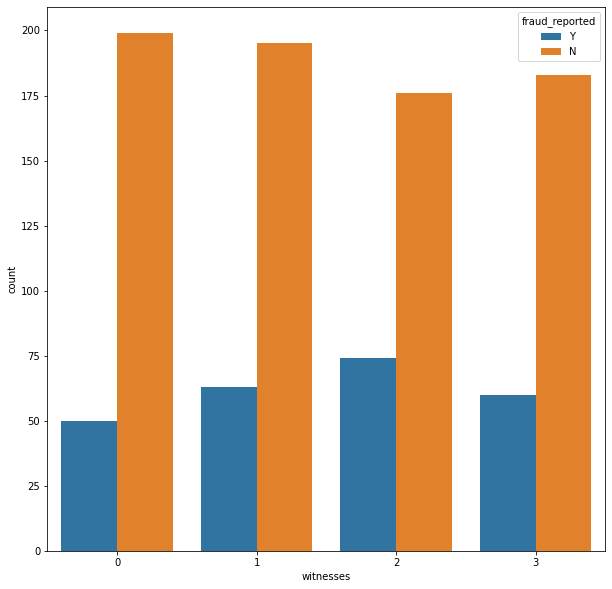

In [40]:
plt.subplots(figsize=(10,10))
sns.countplot(x="witnesses",hue="fraud_reported",data=df)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

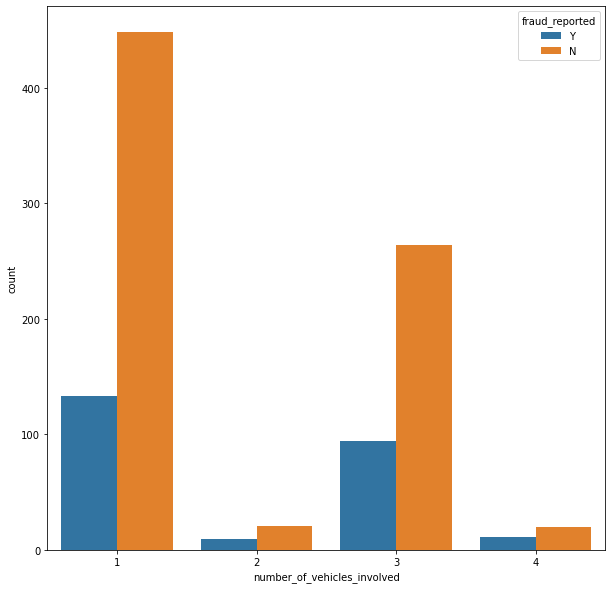

In [41]:
plt.subplots(figsize=(10,10))
sns.countplot(x="number_of_vehicles_involved",hue="fraud_reported",data=df)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

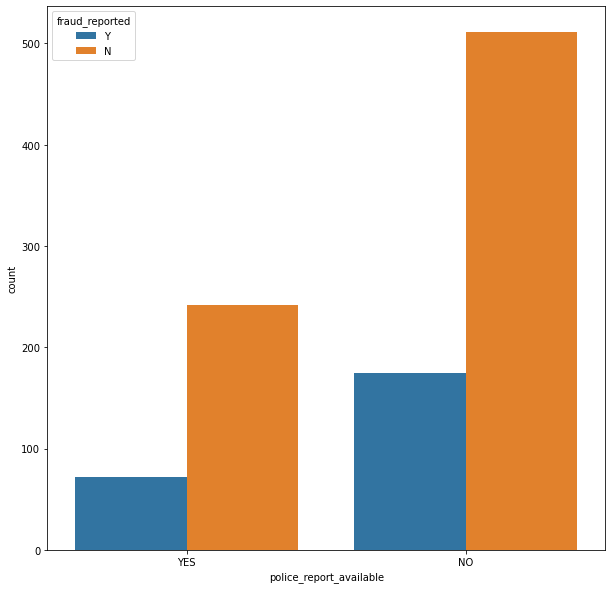

In [42]:
plt.subplots(figsize=(10,10))
sns.countplot(x="police_report_available",hue="fraud_reported",data=df)

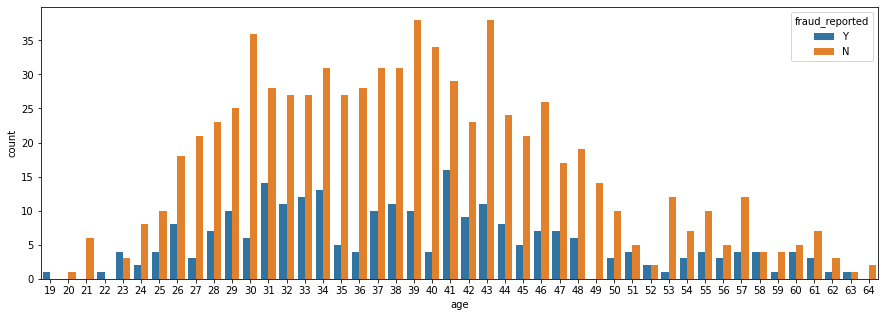

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue='fraud_reported', data=df)
plt.show()

we cannot identify a specific pattern here.

<AxesSubplot:xlabel='auto_year', ylabel='count'>

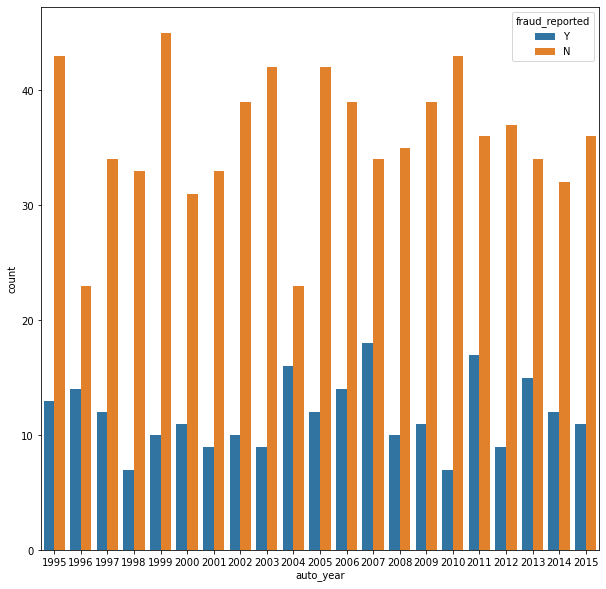

In [38]:
plt.subplots(figsize=(10,10))
sns.countplot(x="auto_year",hue="fraud_reported",data=df)

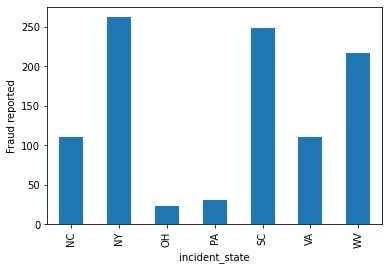

In [29]:
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Highest fraud reported is in NY newyork, SC south carolina and WV west virginia

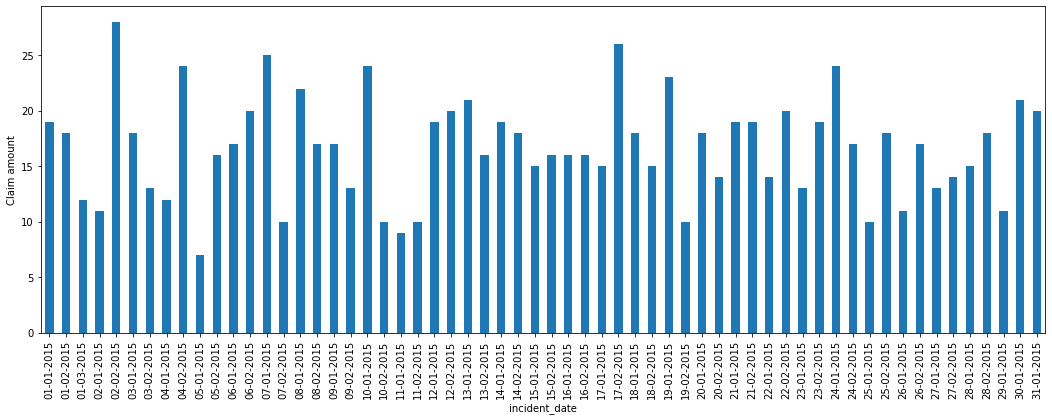

In [30]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount')
plt.show()

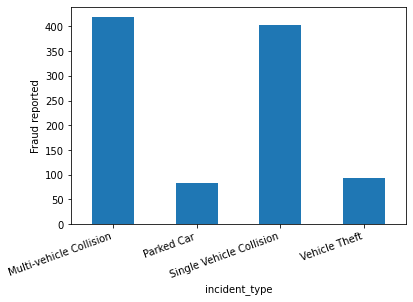

In [31]:
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

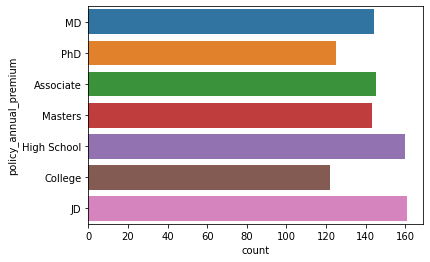

In [43]:
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

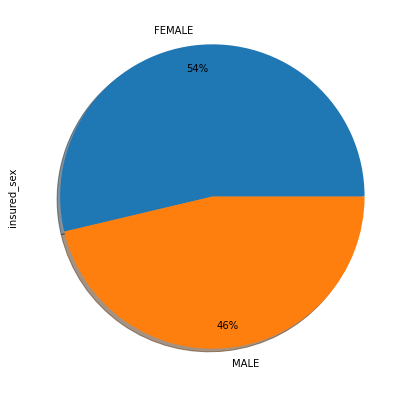

In [44]:
plt.figure(figsize=(7,7))
df['insured_sex'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

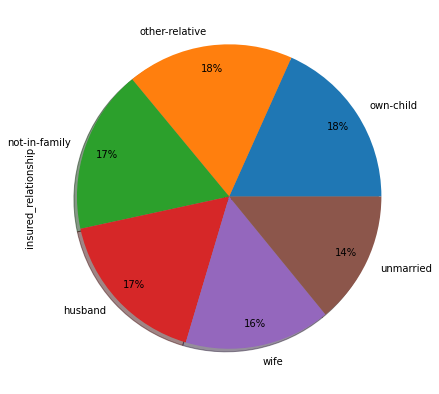

In [45]:
plt.figure(figsize=(7,7))
df['insured_relationship'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

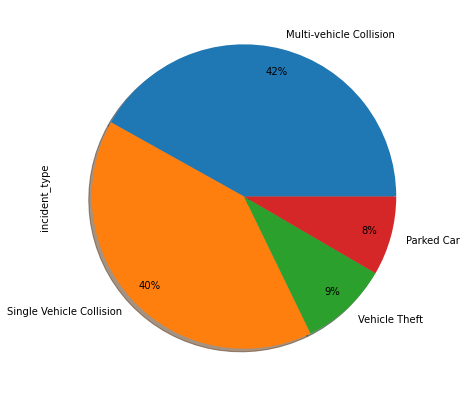

In [46]:
plt.figure(figsize=(7,7))
df['incident_type'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

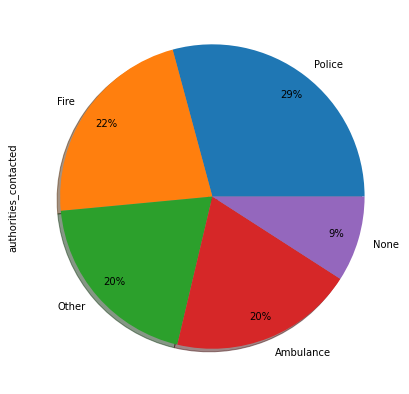

In [47]:
plt.figure(figsize=(7,7))
df['authorities_contacted'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

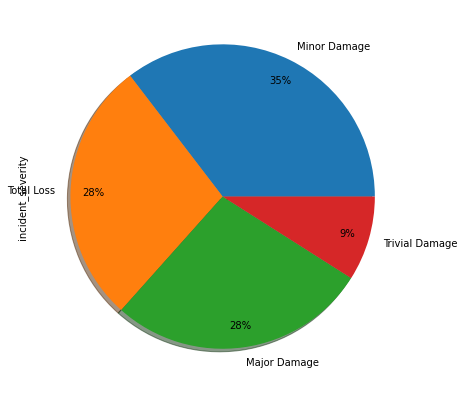

In [49]:
plt.figure(figsize=(7,7))
df['incident_severity'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

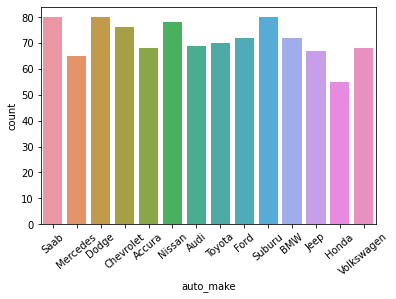

In [48]:
sns.countplot(x='auto_make', data=df)
plt.xticks(rotation=40)
plt.show()

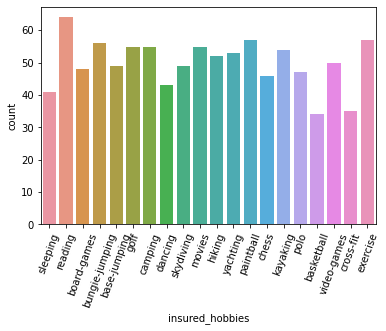

In [50]:
sns.countplot(x='insured_hobbies', data=df)
plt.xticks(rotation=70)
plt.show()

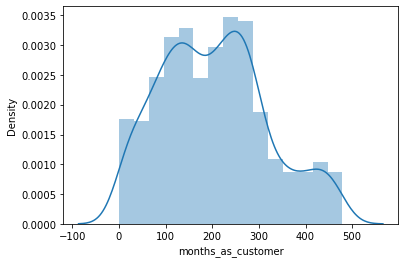

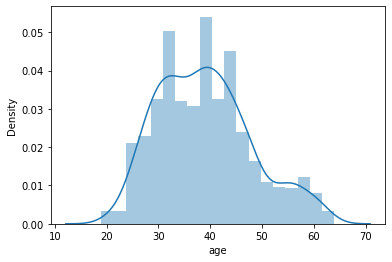

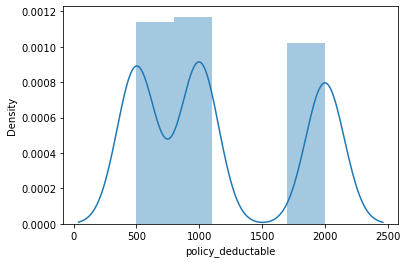

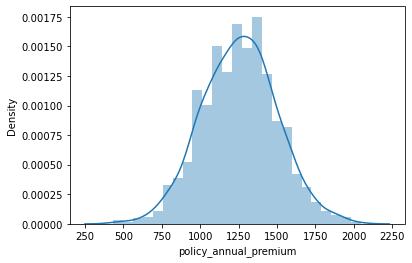

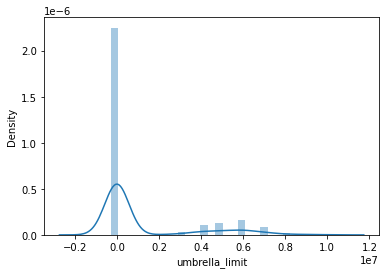

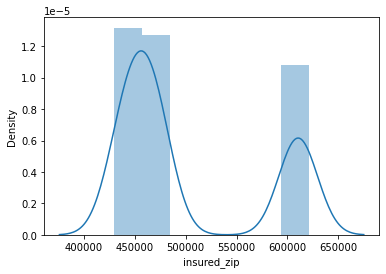

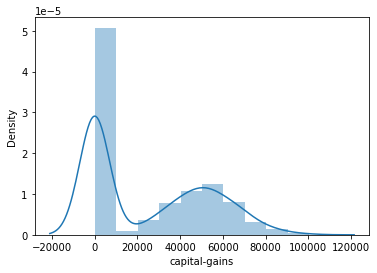

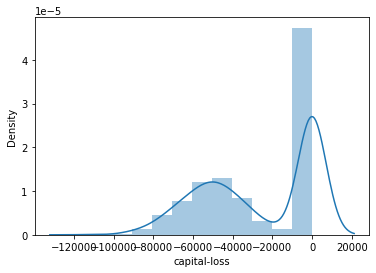

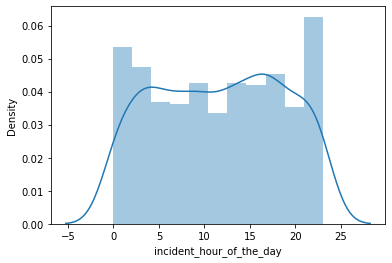

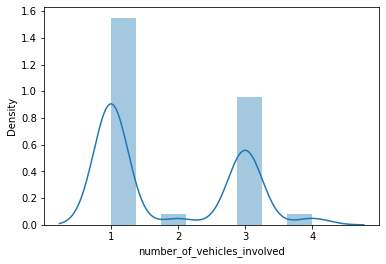

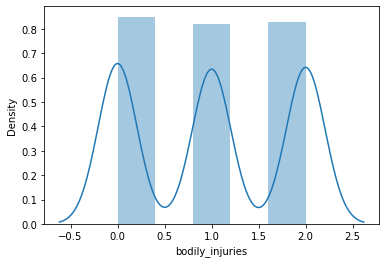

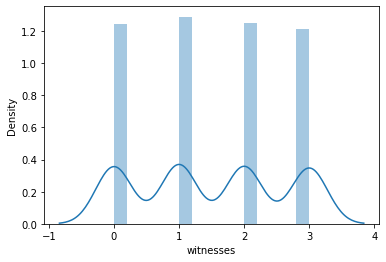

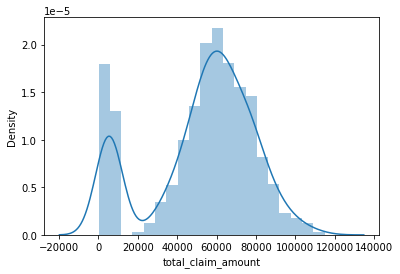

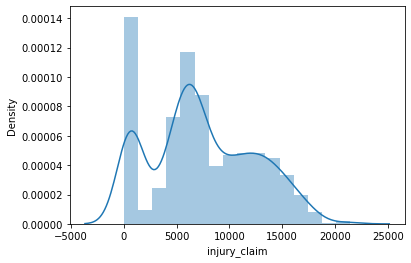

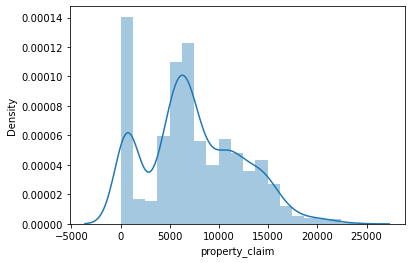

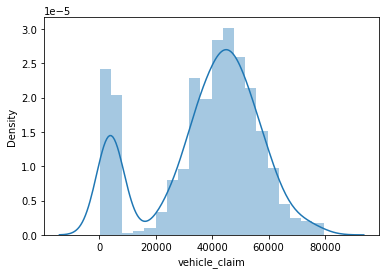

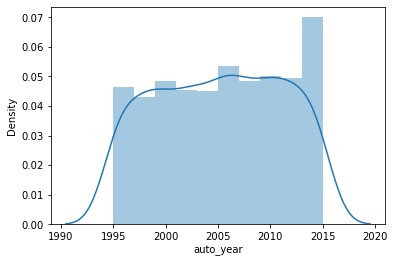

In [51]:
# checking wheather data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

months_as_customer                AxesSubplot(0.125,0.772143;0.0945122x0.107857)
age                            AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
policy_deductable              AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
policy_annual_premium          AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
umbrella_limit                 AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
insured_zip                    AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
capital-gains                  AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
capital-loss                      AxesSubplot(0.125,0.642714;0.0945122x0.107857)
incident_hour_of_the_day       AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
number_of_vehicles_involved    AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
bodily_injuries                AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
witnesses                      AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
total_claim_amount          

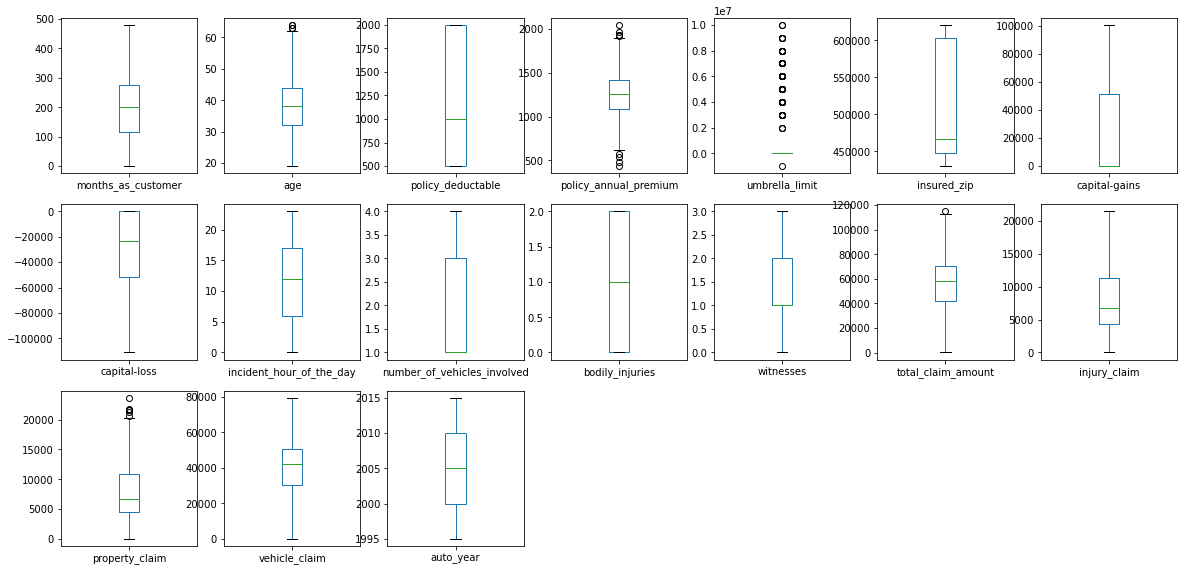

In [52]:
df.plot(kind='box',subplots=True,layout=(6,7),figsize=(20,20))

{'bodies': [<matplotlib.collections.PolyCollection at 0x2267e1fc6a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2267e251a30>,
 'cmins': <matplotlib.collections.LineCollection at 0x2267d824400>,
 'cbars': <matplotlib.collections.LineCollection at 0x2267e2618b0>}

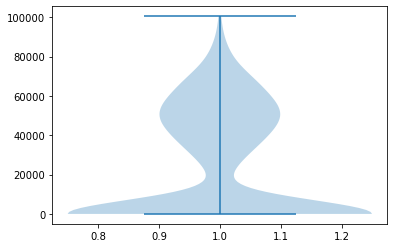

In [53]:
plt.violinplot(df["capital-gains"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2267d47e640>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2267a138df0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2267a7c9d00>,
 'cbars': <matplotlib.collections.LineCollection at 0x2267a5936d0>}

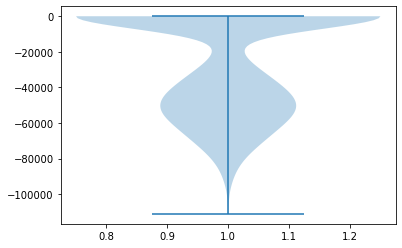

In [54]:
plt.violinplot(df["capital-loss"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2267d532040>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2267d5321c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2267d3d9400>,
 'cbars': <matplotlib.collections.LineCollection at 0x2267d3d91c0>}

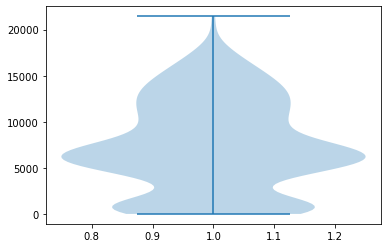

In [55]:
plt.violinplot(df["injury_claim"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2267d897100>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2267a627d00>,
 'cmins': <matplotlib.collections.LineCollection at 0x2267d9f7d90>,
 'cbars': <matplotlib.collections.LineCollection at 0x2267dab10d0>}

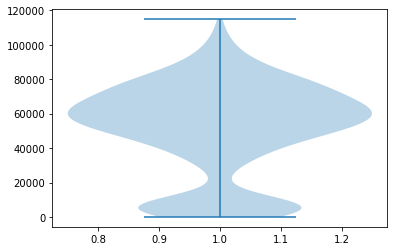

In [56]:

plt.violinplot(df["total_claim_amount"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2267db009d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2267db007f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2267db00850>,
 'cbars': <matplotlib.collections.LineCollection at 0x2267db0e1c0>}

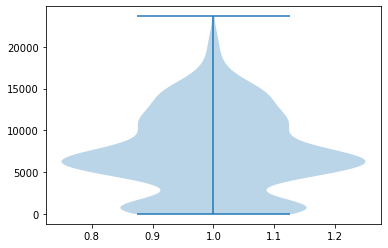

In [57]:
plt.violinplot(df["property_claim"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2267db56fa0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2267db56dc0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2267db62490>,
 'cbars': <matplotlib.collections.LineCollection at 0x2267db62790>}

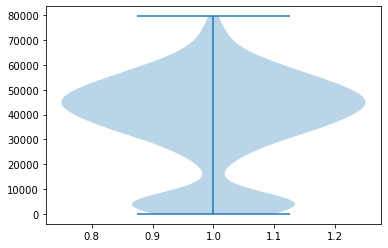

In [58]:
plt.violinplot(df["vehicle_claim"])

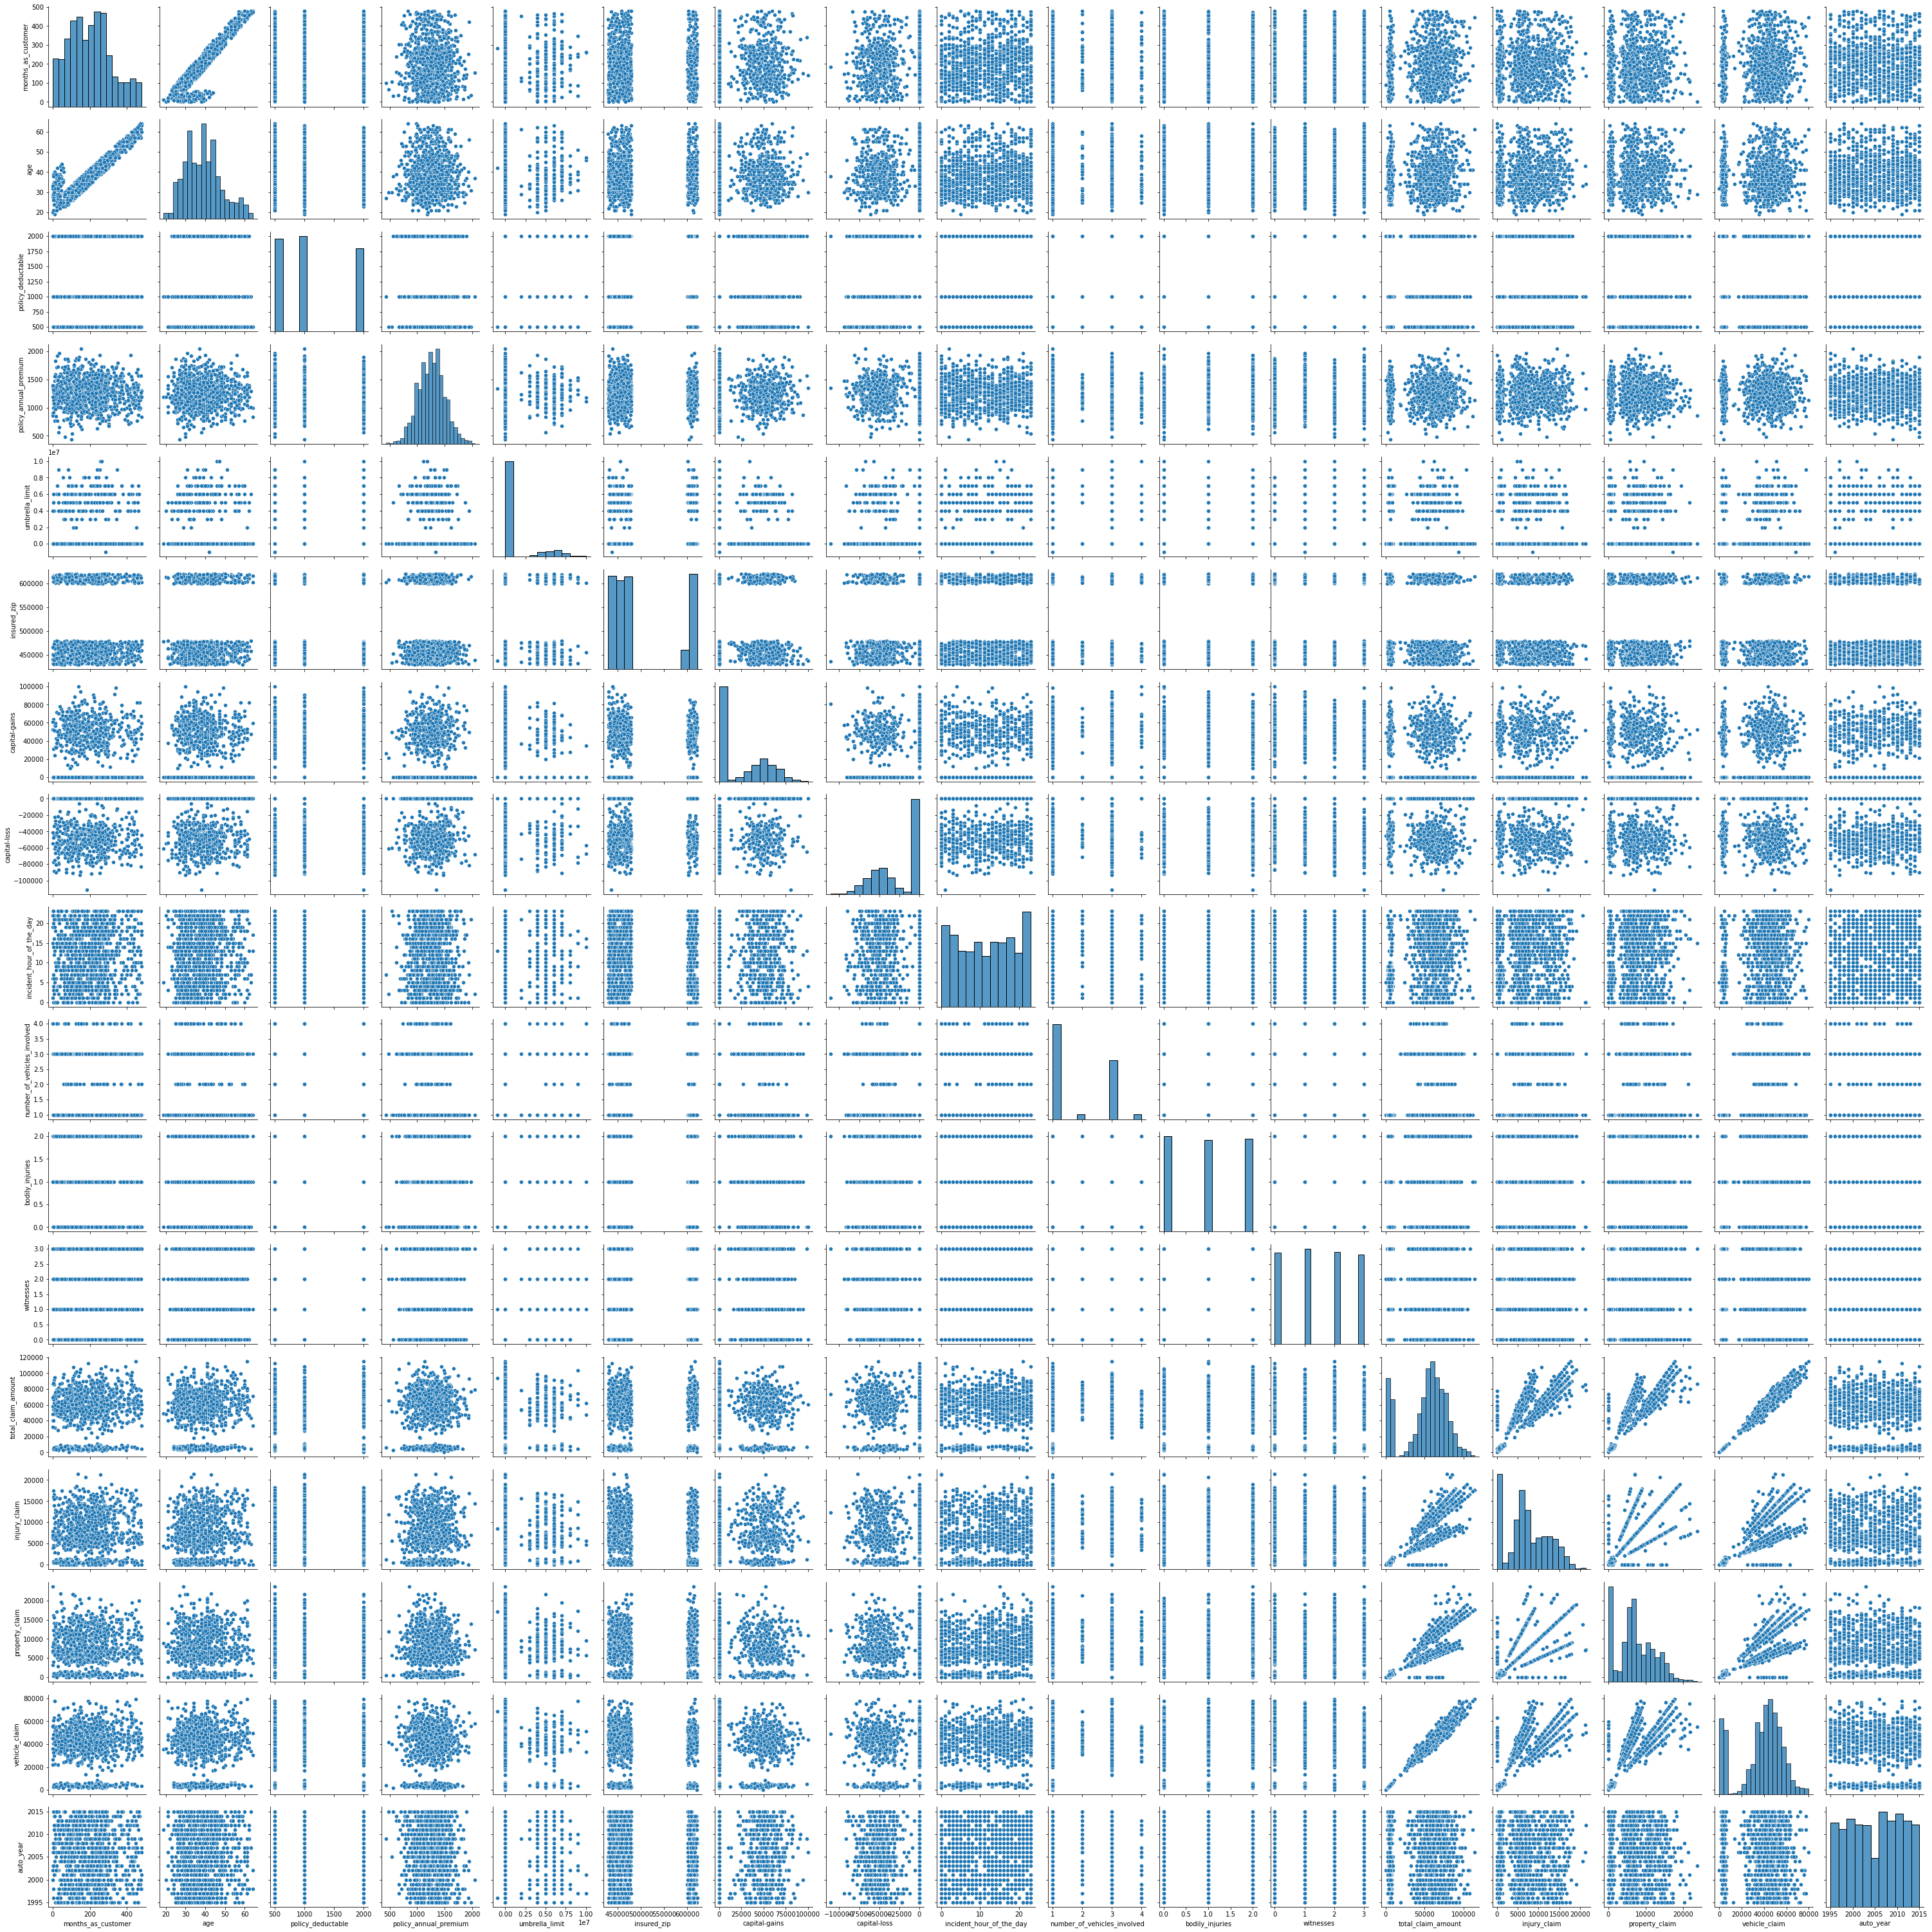

In [59]:
sns.pairplot(df)


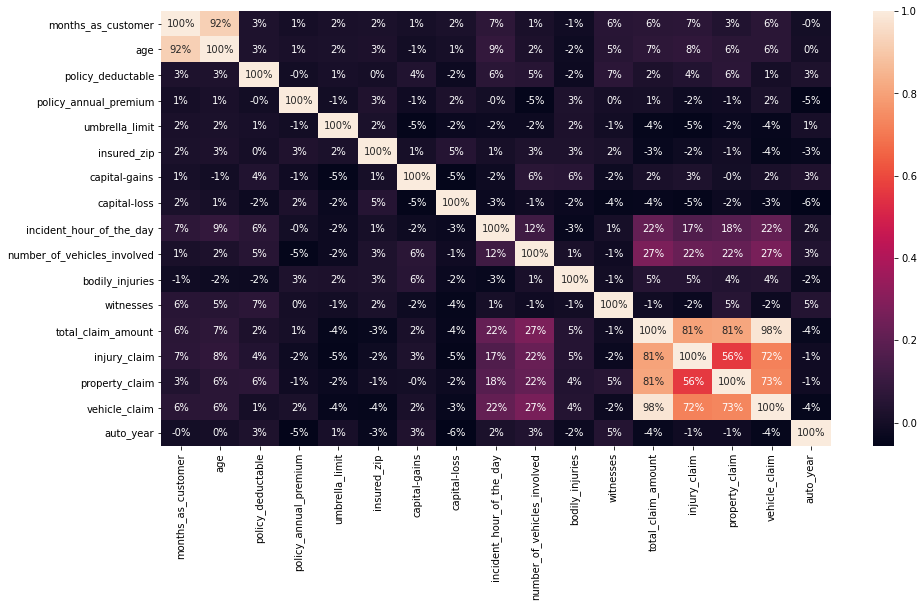

In [60]:
#Heat map to see correlation of numeric variables.
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

FEATURE ENGINEERING

In [62]:
# converting target column to numeric with Label encoding
df['fraud_reported'] = LabelEncoder().fit_transform(df['fraud_reported'])

In [63]:
# Lets remove some more irrelevant columns
df = df.drop(columns = [ 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

In [64]:
df._get_numeric_data().head()  # Checking numeric columns

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  number_of_vehicles_involved  \
0               0          53300             0                            1   
1         5000000              0             0                            1   
2         5000000          35100             0                            3   
3         6000000          48900        -62400                            1   
4         6000000          66000        -46000                            1   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                1          2               71610          6510   
1                0          0                5070           780   
2                2          3               34650          7700   
3                1          2               63400          6340   
4                0          1                6500          1300   

   property_claim  vehicle_claim  fraud_reported  
0           13020          52080               1  
1             780           3510               1  
2            3850          23100               0  
3            6340          50720               1  
4             650           4550               0

In [65]:
#Checking numeric columns
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [66]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [67]:
# converting all other categoric columns to numeric with one hot encoding.

df_dummies= pd.get_dummies(df)
df_dummies.head(2)

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   

   umbrella_limit  capital-gains  capital-loss  number_of_vehicles_involved  \
0               0          53300             0                            1   
1         5000000              0             0                            1   

   bodily_injuries  witnesses  ...  auto_model_Pathfinder  auto_model_RAM  \
0                1          2  ...                      0               0   
1                0          0  ...                      0               0   

   auto_model_RSX  auto_model_Silverado  auto_model_TL  auto_model_Tahoe  \
0               0                     0              0                 0   
1               0                     0              0                 0   

   auto_model_Ultima  auto_model_Wrangler  auto_model_X5  auto_model_X6  
0                  0                    0              0              0  
1                  0                    0              0              0  

[2 rows x 154 columns]

# Statistical Analysis

In [78]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       number_of_vehicles_involved  bodily_injuries    witnesses  \
count                   1000.00000      1000.000000  1000.000000   
mean                       1.83900         0.992000     1.487000   
std                        1.01888         0.820127     1.111335   
min                        1.00000         0.000000     0.000000   
25%                        1.00000         0.000000     1.000000   
50%                        1.00000         1.000000     1.000000   
75%                        3.00000         2.000000     2.000000   
max                        4.00000         2.000000     3.000000   

       total_claim_amount  injury_claim  property_claim  vehicle_claim  \
count          1000.00000   1000.000000     1000.000000    1000.000000   
mean          52761.94000   7433.420000     7399.570000   37928.950000   
std           26401.53319   4880.951853     4824.726179   18886.252893   
min             100.00000      0.000000        0.000000      70.000000   
25%           41812.50000   4295.000000     4445.000000   30292.500000   
50%           58055.00000   6775.000000     6750.000000   42100.000000   
75%           70592.50000  11305.000000    10885.000000   50822.500000   
max          114920.00000  21450.000000    23670.000000   79560.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

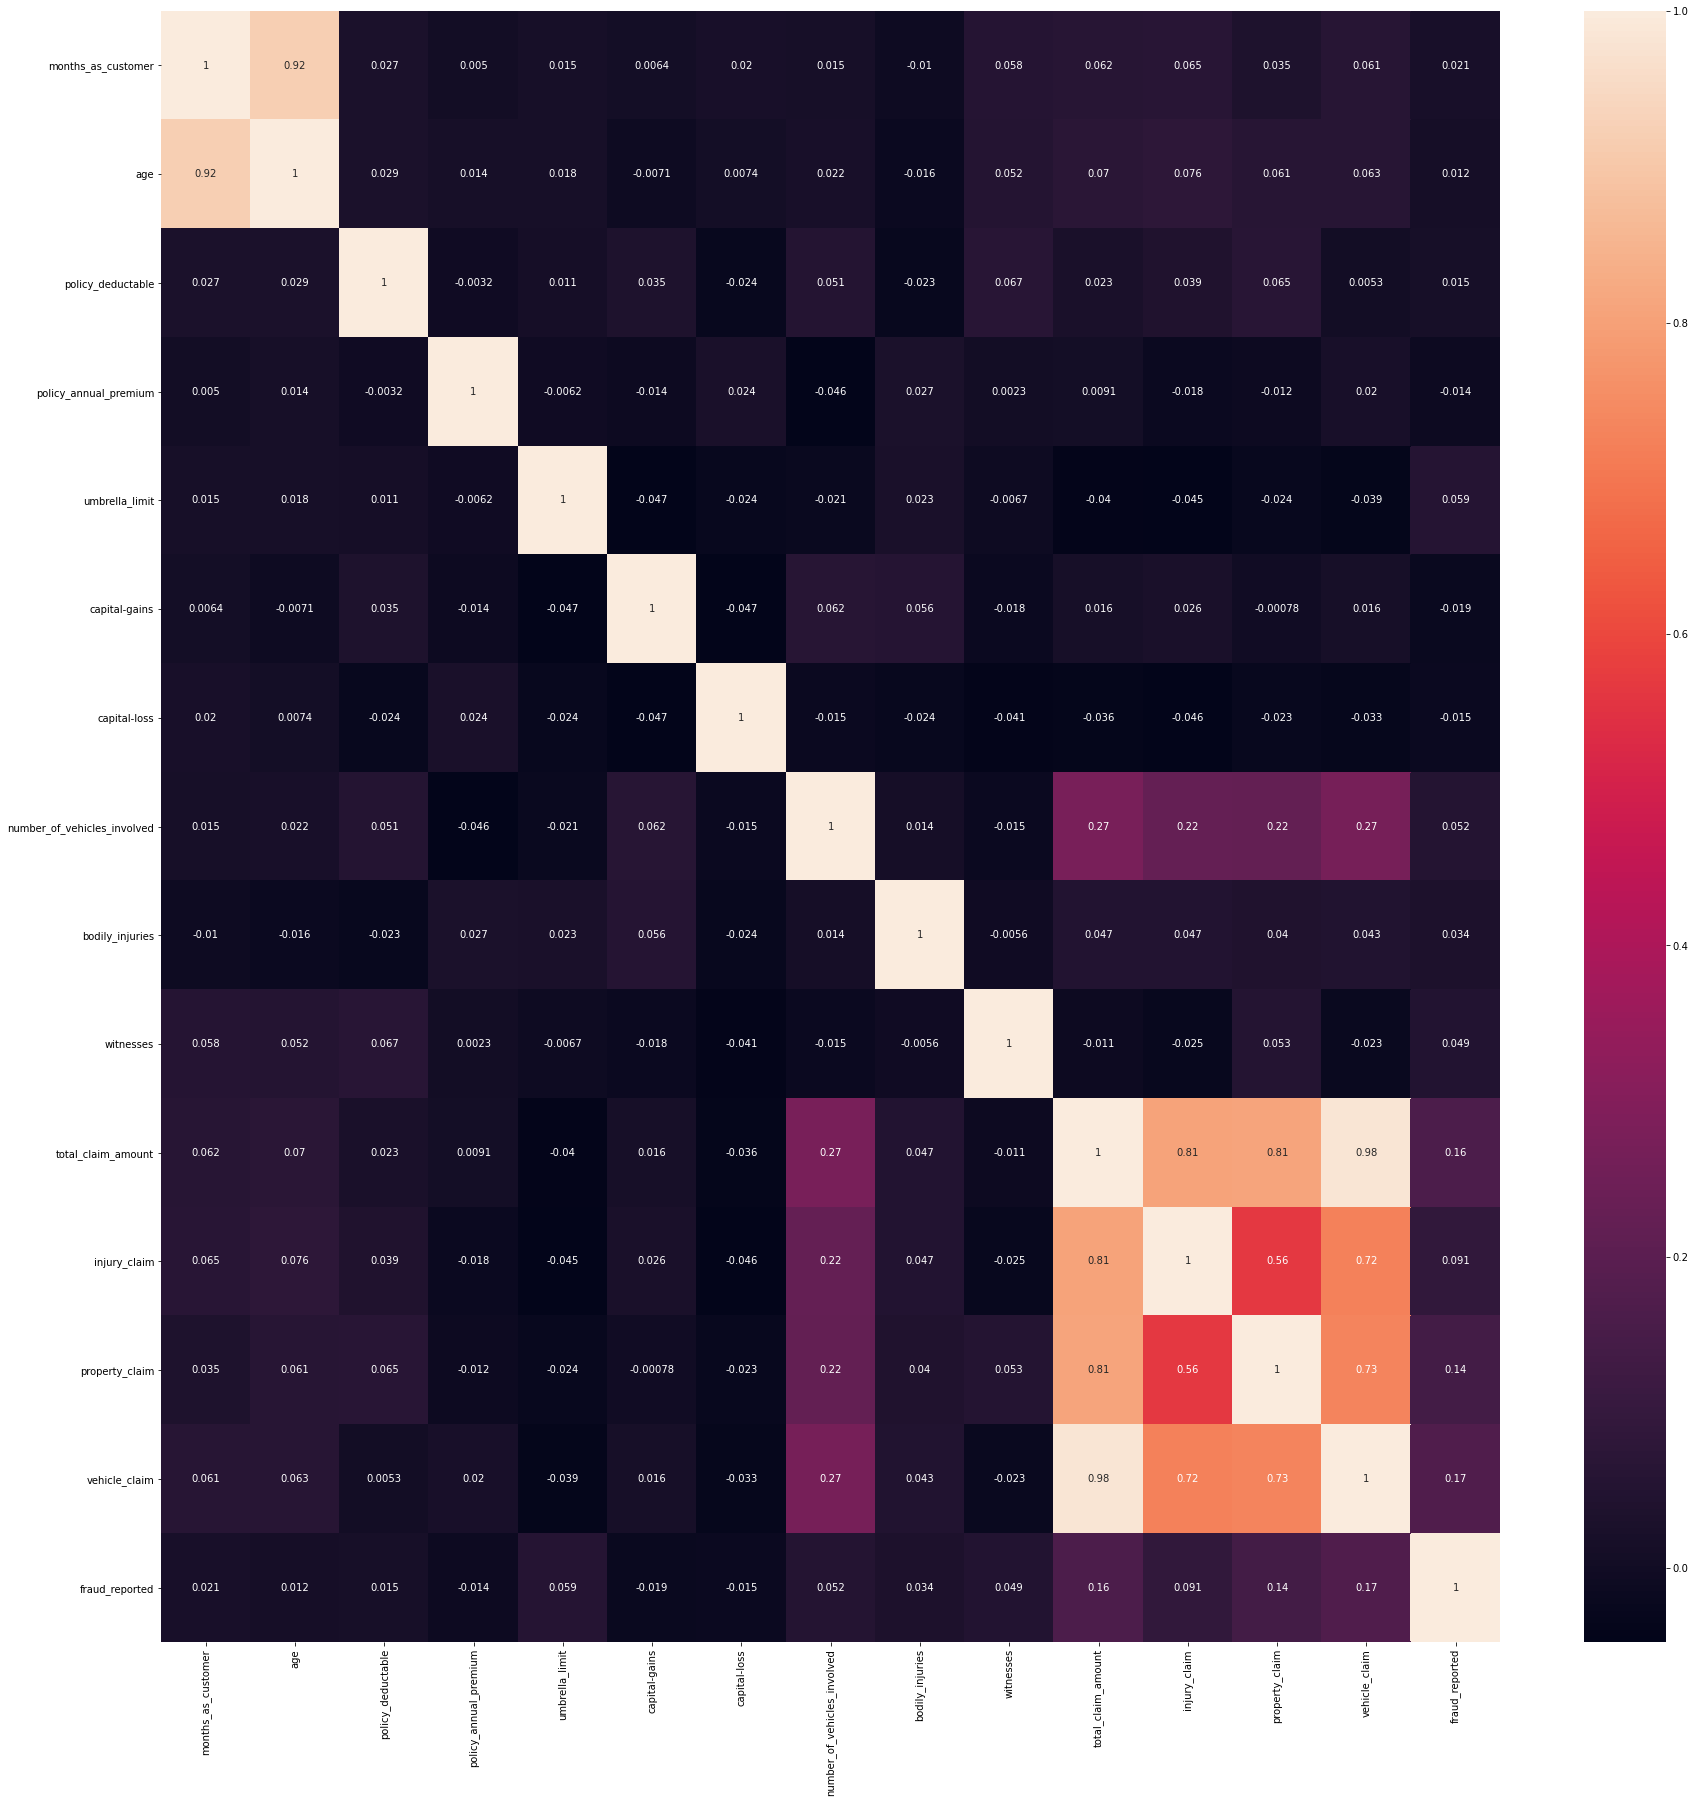

In [79]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show

In [80]:
df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
fraud_reported                         0.020544  0.012143           0.014817   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
fraud_reported                           -0.014480        0.058622   

                             capital-gains  capital-loss  \
months_as_customer                0.006399      0.020209   
age                              -0.007075      0.007368   
policy_deductable                 0.035212     -0.023544   
policy_annual_premium            -0.013738      0.023547   
umbrella_limit                   -0.047268     -0.024056   
capital-gains                     1.000000     -0.046904   
capital-loss                     -0.046904      1.000000   
number_of_vehicles_involved       0.061643     -0.014895   
bodily_injuries                   0.055829     -0.024418   
witnesses                        -0.017651     -0.041330   
total_claim_amount                0.015980     -0.036060   
injury_claim                      0.025934     -0.046060   
property_claim                   -0.000779     -0.022863   
vehicle_claim                     0.015836     -0.032665   
fraud_reported                   -0.019173     -0.014863   

                             number_of_vehicles_involved  bodily_injuries  \
months_as_customer                              0.014736        -0.010162   
age                                             0.022102        -0.015679   
policy_deductable                               0.051214        -0.022765   
policy_annual_premium                          -0.045991         0.026780   
umbrella_limit                                 -0.021270         0.022743   
capital-gains                                   0.061643         0.055829   
capital-loss                                   -0.014895        -0.024418   
number_of_vehicles_involved                     1.

As we can see that total claim amount is a sum of injury claim , property claim and vechicle claim and they are highly co-related with each other .So we can drop injury claim, property claim and vehicle claim

In [81]:
df.drop(columns=["injury_claim"],inplace=True)
df.drop(columns=["property_claim"],inplace=True)
df.drop(columns=["vehicle_claim"],inplace=True)

# MODELLING

In [68]:
# Creating dependent and independent variable.
y= df['fraud_reported']
x= df_dummies.drop('fraud_reported', axis=1)

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.22,random_state=1)

In [83]:
x.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  number_of_vehicles_involved  \
0               0          53300             0                            1   
1         5000000              0             0                            1   
2         5000000          35100             0                            3   
3         6000000          48900        -62400                            1   
4         6000000          66000        -46000                            1   

   bodily_injuries  witnesses  ...  auto_model_Pathfinder  auto_model_RAM  \
0                1          2  ...                      0               0   
1                0          0  ...                      0               0   
2                2          3  ...                      0               1   
3                1          2  ...                      0               0   
4                0          1  ...                      0               0   

   auto_model_RSX  auto_model_Silverado  auto_model_TL  auto_model_Tahoe  \
0               0                     0              0                 0   
1               0                     0              0                 0   
2               0                     0              0                 0   
3               0                     0              0                 1   
4               1                     0              0                 0   

   auto_model_Ultima  auto_model_Wrangler  auto_model_X5  auto_model_X6  
0                  0                    0              0              0  
1                  0                    0              0              0  
2                  0                    0              0              0  
3                  0                    0              0              0  
4                  0                    0              0              0  

[5 rows x 153 columns]

In [84]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [85]:
print(x.shape)
print(y.shape)

(1000, 153)
(1000,)


In [86]:
y=y.values.reshape(-1,1)

In [87]:
y.shape

(1000, 1)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [89]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [90]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 65 is 0.875


65

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 153)
(750, 1)
(250, 153)
(250, 1)


RANDOM FOREST CLASSIFIER

In [70]:
rfc= RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100,max_depth=6,min_samples_leaf=8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[158   1]
 [ 61   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.99      0.84       159
           1       0.00      0.00      0.00        61

    accuracy                           0.72       220
   macro avg       0.36      0.50      0.42       220
weighted avg       0.52      0.72      0.60       220

Accuracy score: 0.7181818181818181


In [71]:
# Cross Validated score for RFC.
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for RFC is:",scr2.mean())

Cross Validated score for RFC is: 0.757


DECISION TREE CLASSIFIER

In [73]:
dtc= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6,min_samples_leaf=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[153   6]
 [ 37  24]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.96      0.88       159
           1       0.80      0.39      0.53        61

    accuracy                           0.80       220
   macro avg       0.80      0.68      0.70       220
weighted avg       0.80      0.80      0.78       220

Accuracy Score: 0.8045454545454546


In [74]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.8480000000000001


Roc-auc curve

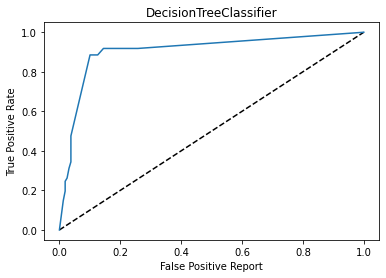

In [75]:
y_pred_prob= dtc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=  roc_curve(y_test,y_pred_prob )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False Positive Report')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.show()

# SAVING MODEL

In [76]:
import pickle
# save the model to disk
filename = 'finalized_insurance_Claimfraud.pkl'
pickle.dump(dtc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)